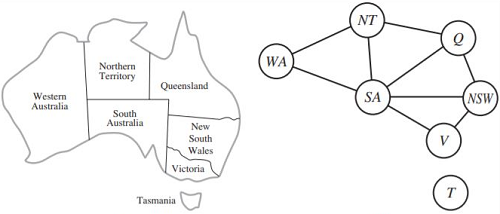

**Code to color Australian map**

In [ ]:
!pip install --upgrade cartopy
def color_ausMap(map_colors):
  import matplotlib.pyplot as plt
  import cartopy.crs as ccrs
  import cartopy.feature as cfeature
  import cartopy.io.shapereader as shpreader

  color_map = {'R': 'red', 'G': 'green', 'B': 'blue', None: 'white'}

  # Load Natural Earth states shapefile
  shapename = 'admin_1_states_provinces'
  states_shp = shpreader.natural_earth(resolution='10m',
                                    category='cultural',
                                    name=shapename)
  reader = shpreader.Reader(states_shp)

  fig = plt.figure(figsize=(6, 4))
  ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
  ax.set_extent((112, 154, -44, -10), crs=ccrs.PlateCarree())

  # Add base map features
  ax.add_feature(cfeature.COASTLINE)
  ax.add_feature(cfeature.BORDERS, linestyle=':')
  ax.add_feature(cfeature.LAND, edgecolor='black')
  ax.set_title('Australian States Colored (Smooth Boundaries)')

  # Plot states with smooth boundaries
  for state in reader.records():
      if state.attributes.get('admin') == 'Australia':
          state_code = state.attributes['postal']  # e.g., 'WA', 'NS'

          if state_code in map_colors:
              color = color_map[map_colors[state_code]]
              ax.add_geometries(
                  [state.geometry],
                  ccrs.PlateCarree(),
                  facecolor=color,
                  edgecolor='black',
                  alpha=0.7
              )
              # Add state abbreviation labels
              centroid = state.geometry.centroid
              ax.text(
                  centroid.x,
                  centroid.y,
                  state_code,
                  ha='center',
                  va='center',
                  transform=ccrs.PlateCarree(),
                  fontsize=9,
                  weight='bold'
              )

  plt.show()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 65.7 MB/s eta 0:00:00


#  Australian Map Coloring CSP with Backtracking

Solution: {'WA': 'R', 'NT': 'G', 'QL': 'R', 'SA': 'B', 'NS': 'G', 'VI': 'R', 'TS': 'R'}


/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_1_states_provinces.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


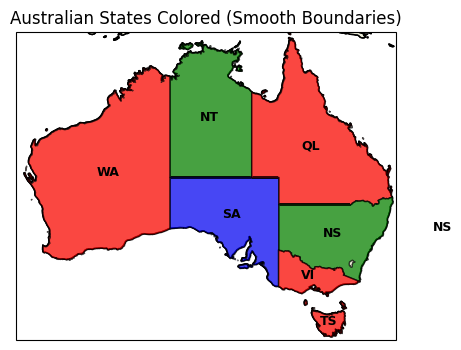

In [ ]:
# Graph: adjacency list representation
cgraph = {
    'WA': ['SA', 'NT'],
    'NT': ['QL', 'WA', 'SA'],
    'QL': ['SA', 'NT', 'NS'],
    'SA': ['WA', 'NT', 'QL', 'NS', 'VI'],
    'NS': ['QL', 'VI', 'SA'],
    'VI': ['SA', 'NS'],
    'TS': []
}

# Available colors
colors = ['R', 'G', 'B']


def is_valid(node, color, assignment, graph):
    """Check if assigning 'color' to 'node' is valid given current assignment."""
    for neighbor in graph[node]:
        if neighbor in assignment and assignment[neighbor] == color:
            return False
    return True


def backtrack(assignment, graph):
    """Backtracking search for CSP solution."""
    # If all variables are assigned, return assignment
    if len(assignment) == len(graph):
        return assignment

    # Select an unassigned variable
    unassigned = [v for v in graph if v not in assignment]
    node = unassigned[0]

    # Try available colors
    for color in colors:
        if is_valid(node, color, assignment, graph):
            assignment[node] = color
            result = backtrack(assignment, graph)
            if result:
                return result
            # Backtrack
            del assignment[node]

    return None


# Solve CSP
solution = backtrack({}, cgraph)
print("Solution:", solution)
color_ausMap(solution)

#  Backtracing with Forward Checking

Solution with Forward Checking: {'WA': 'R', 'QL': 'R', 'TS': 'R', 'VI': 'R', 'SA': 'G', 'NT': 'B', 'NS': 'B'}


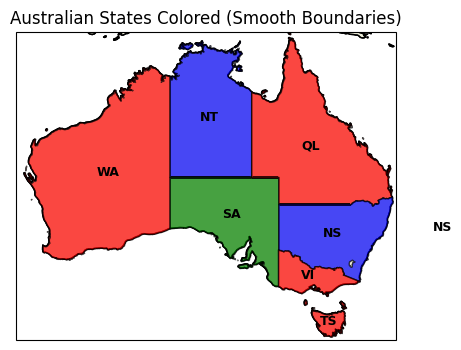

In [ ]:
# Australian Map Coloring CSP with Backtracking + Forward Checking

cgraph = {
    'WA': ['SA', 'NT'],
    'NT': ['QL', 'WA', 'SA'],
    'QL': ['SA', 'NT', 'NS'],
    'SA': ['WA', 'NT', 'QL', 'NS', 'VI'],
    'NS': ['QL', 'VI', 'SA'],
    'VI': ['SA', 'NS'],
    'TS': []
}

colors = ['R', 'G', 'B']


def forward_checking(assignment, domains, node, color, graph):
    """
    Apply forward checking:
    Remove 'color' from neighbors' domains.
    Return False if any neighbor's domain becomes empty.
    """
    for neighbor in graph[node]:
        if neighbor not in assignment:
            if color in domains[neighbor]:
                domains[neighbor].remove(color)
                if not domains[neighbor]:  # Empty domain → failure
                    return False
    return True


def backtrack_fc(assignment, domains, graph):
    """Backtracking with Forward Checking."""
    if len(assignment) == len(graph):
        return assignment

    # Select an unassigned variable (simple order)
    unassigned = [v for v in graph if v not in assignment]
    node = unassigned[0]

    # Try colors from domain
    for color in list(domains[node]):
        # Copy domains for safe backtracking
        local_domains = {v: list(domains[v]) for v in domains}

        assignment[node] = color

        if forward_checking(assignment, local_domains, node, color, graph):
            result = backtrack_fc(assignment, local_domains, graph)
            if result:
                return result

        # Backtrack
        del assignment[node]

    return None


# Initialize domains (all variables have all colors at start)
domains = {v: list(colors) for v in cgraph}

# Solve CSP with Forward Checking
solution_fc = backtrack_fc({}, domains, cgraph)
print("Solution with Forward Checking:", solution_fc)
color_ausMap(solution_fc)

## 1) Highest Degree Heuristic

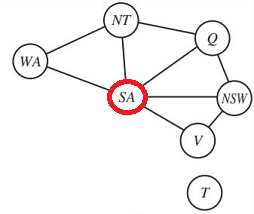

Solution with Forward Checking + Highest Degree Heuristic: {'SA': 'R', 'QL': 'G', 'WA': 'G', 'VI': 'G', 'TS': 'R', 'NT': 'B', 'NS': 'B'}


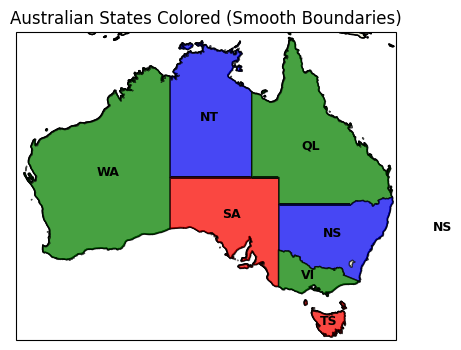

In [ ]:
# Australian Map Coloring CSP with Backtracking + Forward Checking + Highest Degree Heuristic

cgraph = {
    'WA': ['SA', 'NT'],
    'NT': ['QL', 'WA', 'SA'],
    'QL': ['SA', 'NT', 'NS'],
    'SA': ['WA', 'NT', 'QL', 'NS', 'VI'],
    'NS': ['QL', 'VI', 'SA'],
    'VI': ['SA', 'NS'],
    'TS': []
}

colors = ['R', 'G', 'B']


def forward_checking(assignment, domains, node, color, graph):
    """Apply forward checking to prune neighbor domains."""
    for neighbor in graph[node]:
        if neighbor not in assignment:
            if color in domains[neighbor]:
                domains[neighbor].remove(color)
                if not domains[neighbor]:  # Empty domain => failure
                    return False
    return True


def select_unassigned_variable_hd(assignment, domains, graph):
    """
    Select the unassigned variable using the Highest Degree Heuristic.
    (The one with the most unassigned neighbors).
    """
    unassigned = [v for v in graph if v not in assignment]
    # Sort by degree (number of neighbors), descending
    return max(unassigned, key=lambda var: len([n for n in graph[var] if n not in assignment]))


def backtrack_fc_hd(assignment, domains, graph):
    """Backtracking + Forward Checking + Highest Degree Heuristic."""
    if len(assignment) == len(graph):
        return assignment

    # Select variable by highest degree heuristic
    node = select_unassigned_variable_hd(assignment, domains, graph)

    for color in list(domains[node]):
        # Copy domains for safe backtracking
        local_domains = {v: list(domains[v]) for v in domains}

        assignment[node] = color

        if forward_checking(assignment, local_domains, node, color, graph):
            result = backtrack_fc_hd(assignment, local_domains, graph)
            if result:
                return result

        # Backtrack
        del assignment[node]

    return None


# Initialize domains (all colors available initially)
domains = {v: list(colors) for v in cgraph}

# Solve CSP
solution_fc_hd = backtrack_fc_hd({}, domains, cgraph)
print("Solution with Forward Checking + Highest Degree Heuristic:", solution_fc_hd)
color_ausMap(solution_fc_hd)

## 2) Minimum Remaining Value (MRV) Heuristic

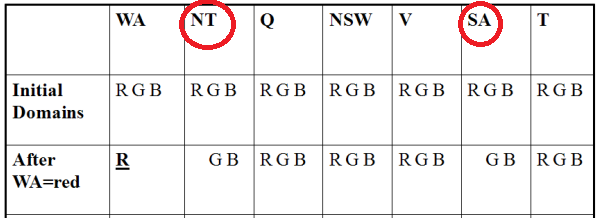

In [ ]:
# write code here

**3) No Heuristic, Select node randomly**

In [ ]:
# write code here

#   Exercise

Insert a new map here and show simulation using different heuristic